In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [130]:
import os
dpath=r"/Users/Cui/Downloads/";
p2016=pd.read_csv(os.path.join(dpath, "properties_2016.csv"))
y2016=pd.read_csv(os.path.join(dpath, "train_2016_v2.csv"))
y2016.head()

/Users/Cui/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [131]:
p2016.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [4]:
y2016.dtypes

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

In [132]:
all2016=p2016.merge(y2016,left_on="parcelid",right_on="parcelid", how="inner")

In [133]:
ulimit = np.percentile(all2016["logerror"], 99)
llimit = np.percentile(all2016["logerror"], 1)
all2016["logerror2"]=np.where(all2016["logerror"]>ulimit, ulimit, np.where(all2016["logerror"]<llimit,llimit,all2016["logerror"]))

/Users/Cui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


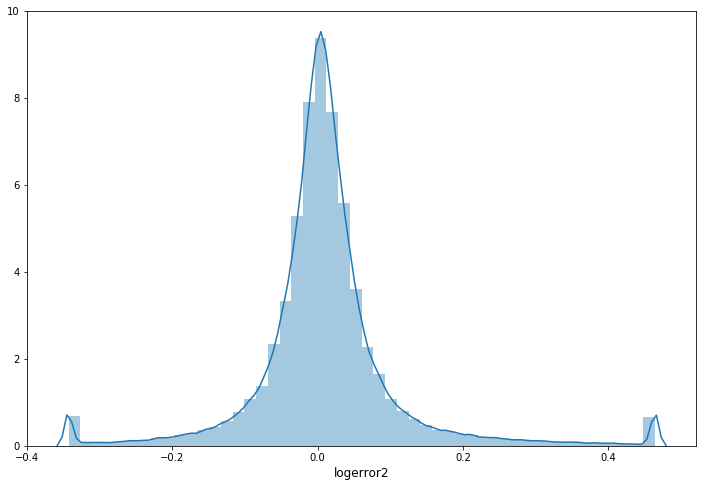

In [134]:
plt.figure(figsize=(12,8))
sns.distplot(all2016["logerror2"] , bins=50, kde=True)
plt.xlabel('logerror2', fontsize=12)
plt.show()

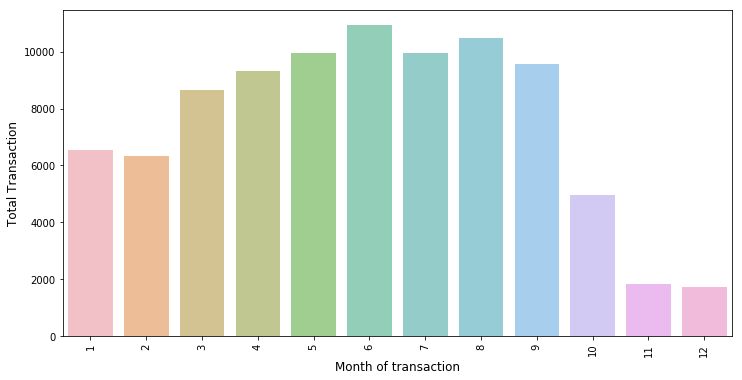

In [135]:
all2016['trans_month']=pd.to_datetime(all2016['transactiondate']).dt.month
cnt_trans=all2016['trans_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_trans.index, cnt_trans.values, alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Total Transaction', fontsize=12)
plt.show()

In [136]:
all2016.isnull().sum().sort_values(ascending=False)[:40]

buildingclasstypeid             90259
finishedsquarefeet13            90242
storytypeid                     90232
basementsqft                    90232
yardbuildingsqft26              90180
fireplaceflag                   90053
architecturalstyletypeid        90014
typeconstructiontypeid          89976
finishedsquarefeet6             89854
decktypeid                      89617
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
taxdelinquencyyear              88492
taxdelinquencyflag              88492
hashottuborspa                  87910
yardbuildingsqft17              87629
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedfloor1squarefeet        83419
fireplacecnt                    80668
threequarterbathnbr             78266
pooltypeid7                     73578
poolcnt                         72374
numberofstories                 69705
airconditioningtypeid           61494
garagetotals

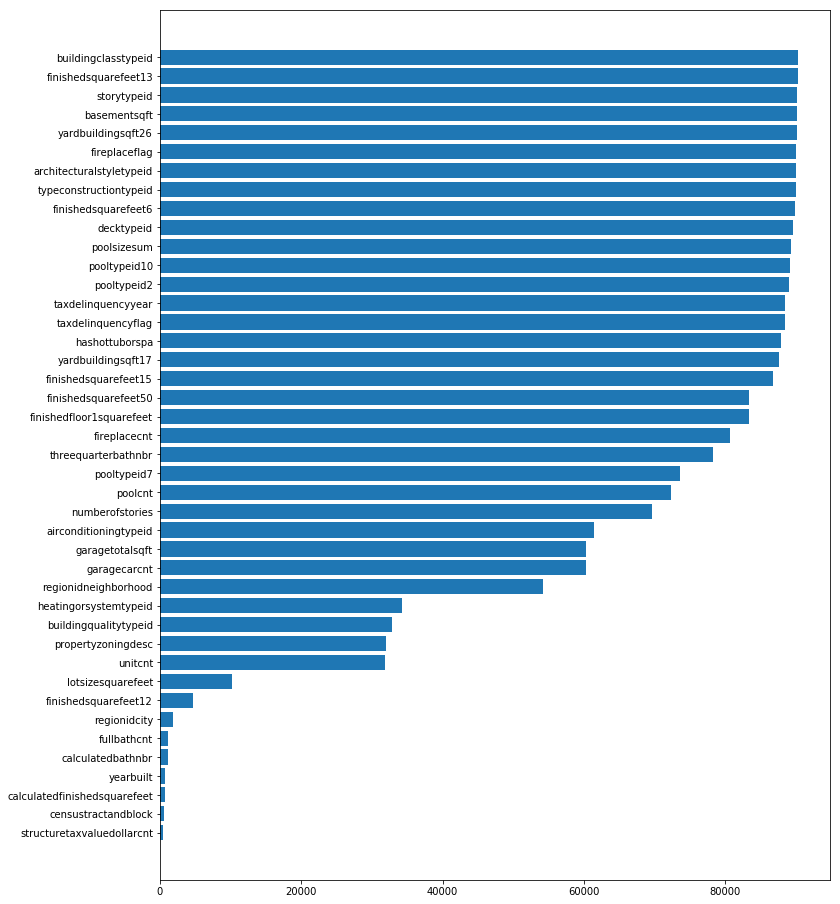

In [137]:
missing_df=all2016.isnull().sum().sort_values(ascending=True)[20:]
fig, ax=plt.subplots(figsize=(12,16))
plt.barh(missing_df.index, missing_df.values)
plt.show()

In [138]:
missing_df.index

Index(['structuretaxvaluedollarcnt', 'censustractandblock',
       'calculatedfinishedsquarefeet', 'yearbuilt', 'calculatedbathnbr',
       'fullbathcnt', 'regionidcity', 'finishedsquarefeet12',
       'lotsizesquarefeet', 'unitcnt', 'propertyzoningdesc',
       'buildingqualitytypeid', 'heatingorsystemtypeid',
       'regionidneighborhood', 'garagecarcnt', 'garagetotalsqft',
       'airconditioningtypeid', 'numberofstories', 'poolcnt', 'pooltypeid7',
       'threequarterbathnbr', 'fireplacecnt', 'finishedfloor1squarefeet',
       'finishedsquarefeet50', 'finishedsquarefeet15', 'yardbuildingsqft17',
       'hashottuborspa', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'pooltypeid2', 'pooltypeid10', 'poolsizesum', 'decktypeid',
       'finishedsquarefeet6', 'typeconstructiontypeid',
       'architecturalstyletypeid', 'fireplaceflag', 'yardbuildingsqft26',
       'basementsqft', 'storytypeid', 'finishedsquarefeet13',
       'buildingclasstypeid'],
      dtype='object')

In [139]:
allmean=all2016.mean()
all2016.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror,logerror2,trans_month
count,9.027500e+04,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,...,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04,90275.000000,90275.000000,90275.000000
mean,1.298466e+07,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,66.0,...,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13,0.011457,0.010404,5.849848
std,2.504510e+06,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,0.0,...,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11,0.161079,0.100614,2.812690
min,1.071174e+07,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,...,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13,-4.605000,-0.342500,1.000000
25%,1.155950e+07,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,...,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13,-0.025300,-0.025300,4.000000
50%,1.254734e+07,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,...,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13,0.006000,0.006000,6.000000
75%,1.422755e+07,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,66.0,...,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13,0.039200,0.039200,8.000000
max,1.629608e+08,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,66.0,...,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13,4.737000,0.463882,12.000000


In [140]:
cat_list=["airconditioningtypeid", "architecturalstyletypeid", "bathroomcnt", "bedroomcnt", "buildingclasstypeid", 
          "buildingqualitytypeid", "calculatedbathnbr", "decktypeid", "fireplacecnt", "fullbathcnt", "garagecarcnt","hashottuborspa",
          "heatingorsystemtypeid","poolcnt","pooltypeid10","pooltypeid2","yearbuilt", "pooltypeid7", "propertylandusetypeid","roomcnt","storytypeid",
          "threequarterbathnbr", "typeconstructiontypeid", "unitcnt","numberofstories", 
          "fireplaceflag","assessmentyear","trans_month"]
          
cont_list=["basementsqft","finishedfloor1squarefeet", "calculatedfinishedsquarefeet", "finishedsquarefeet12", "finishedsquarefeet13","yardbuildingsqft17", "yardbuildingsqft26",
          "finishedsquarefeet15", "finishedsquarefeet50", "finishedsquarefeet6", "garagetotalsqft","lotsizesquarefeet","poolsizesum",
          "structuretaxvaluedollarcnt", "taxvaluedollarcnt", "landtaxvaluedollarcnt","taxamount"]

In [141]:
all_list=cat_list+cont_list
temp1=all2016[all_list].isnull().sum()>0

In [142]:
temp1

airconditioningtypeid            True
architecturalstyletypeid         True
bathroomcnt                     False
bedroomcnt                      False
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
hashottuborspa                   True
heatingorsystemtypeid            True
poolcnt                          True
pooltypeid10                     True
pooltypeid2                      True
yearbuilt                        True
pooltypeid7                      True
propertylandusetypeid           False
roomcnt                         False
storytypeid                      True
threequarterbathnbr              True
typeconstructiontypeid           True
unitcnt                          True
numberofstories                  True
fireplaceflag                    True
assessmentye

In [143]:
missing_list=[]
for var in temp1.index:
    varname=var+"_missing"
    missing_list.append(varname)
    all2016[varname]=all2016[var].isnull()*1
    all2016[var]=all2016[var].fillna(0)

In [144]:
all2016["yearbuilt2"]=round(all2016["yearbuilt"]/10)*10
cat_list.remove("yearbuilt")
cat_list.append("yearbuilt2")

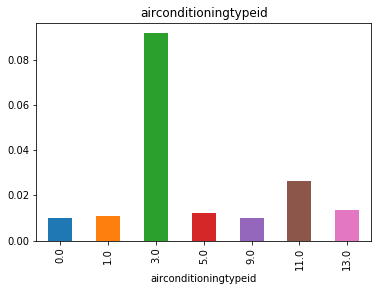

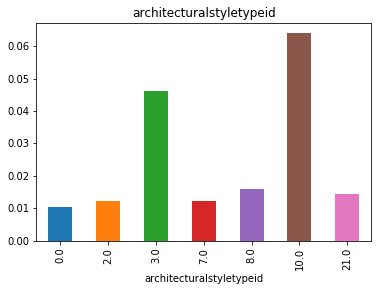

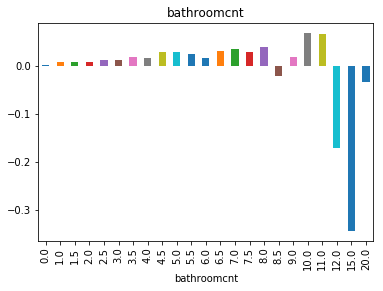

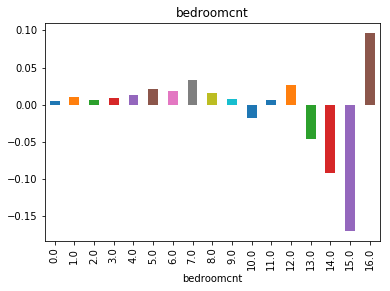

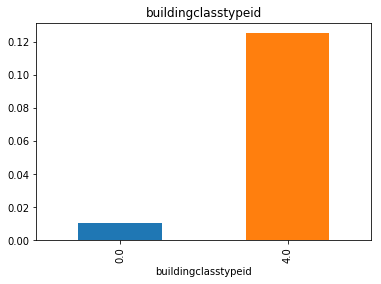

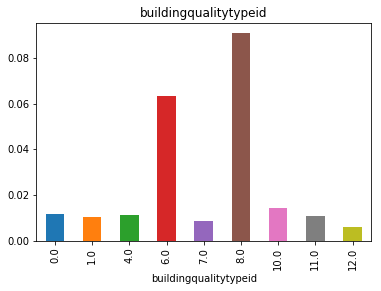

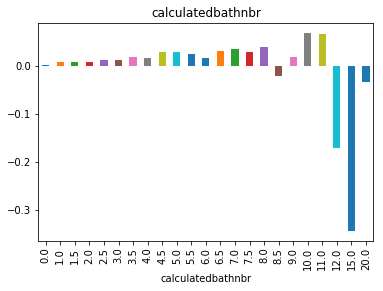

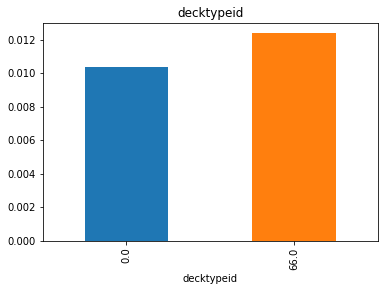

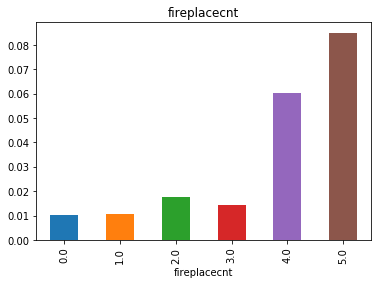

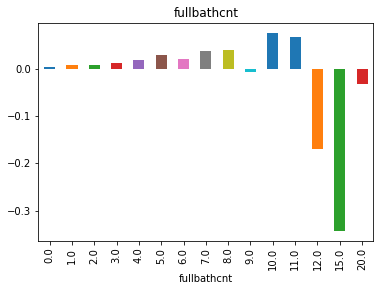

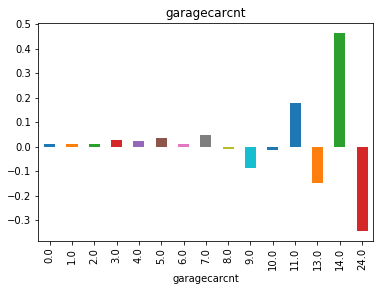

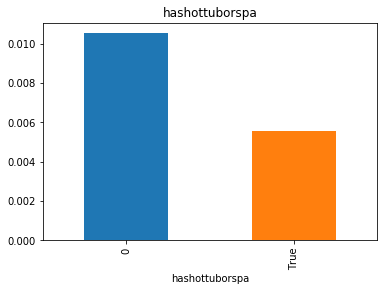

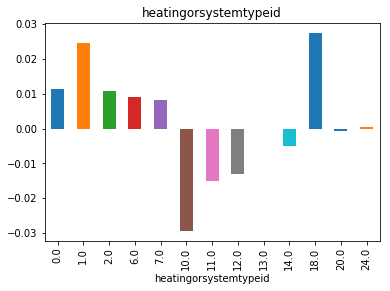

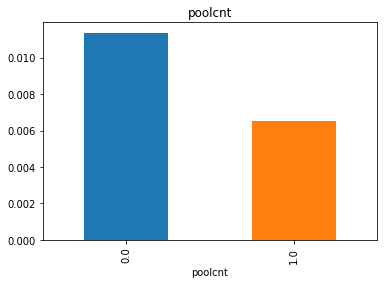

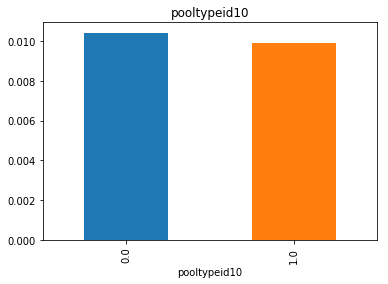

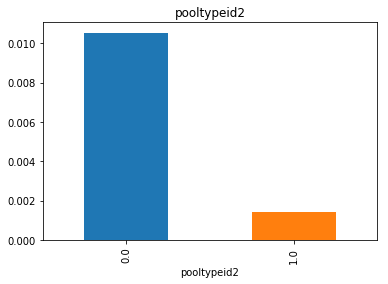

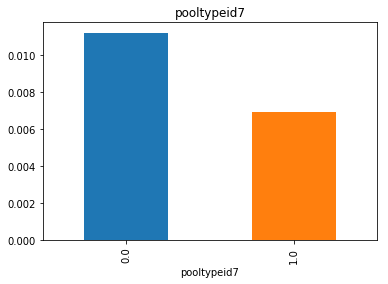

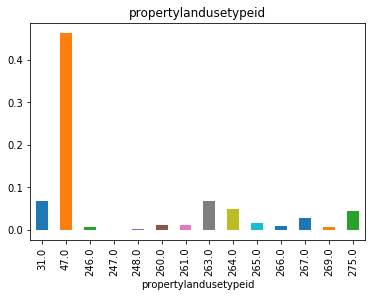

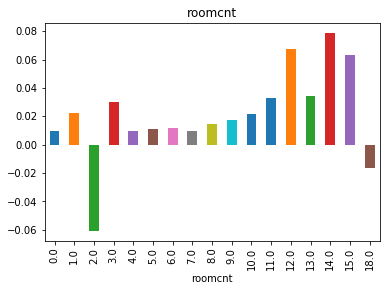

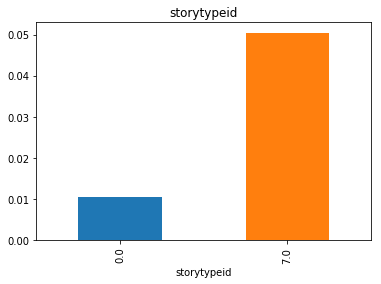

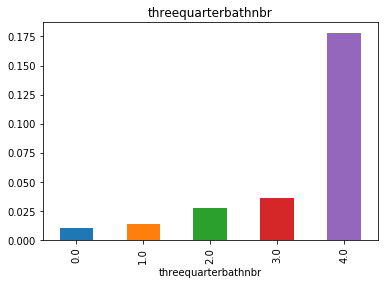

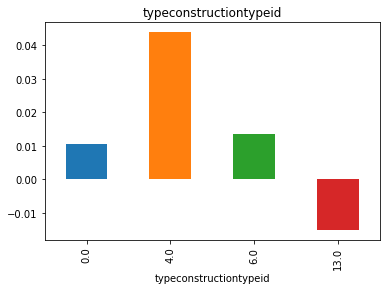

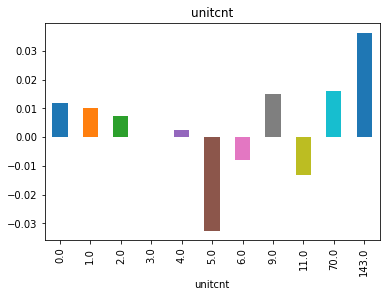

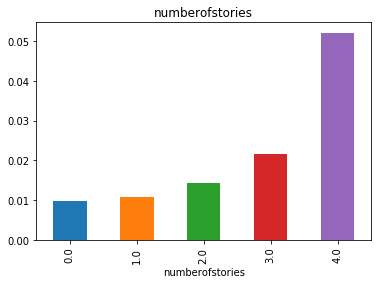

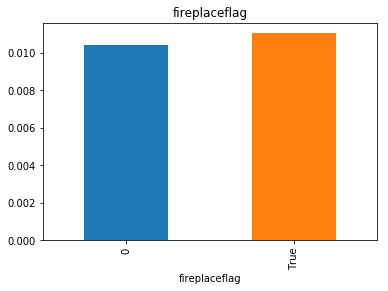

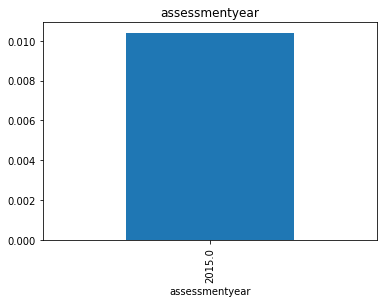

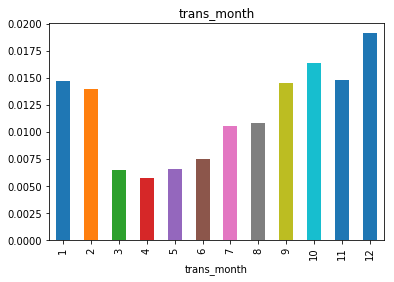

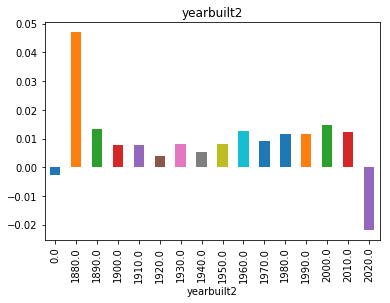

In [145]:
def bi_cat_analysis(data,xvar_list, yvar):
    for xvar in xvar_list:
        temp=data.groupby(xvar)[yvar].mean()
        plt.figure()
        temp.plot.bar()
        plt.title(xvar)
        plt.show()
bi_cat_analysis(all2016,cat_list,'logerror2')

In [146]:
all2016["bathroomcnt"]=round(all2016["bathroomcnt"],0)
all2016["calculatedbathnbr"]=round(all2016["calculatedbathnbr"],0)
all2016["bathroomcnt"]=np.where(all2016["bathroomcnt"]>=10,10,all2016["bathroomcnt"])
all2016["bedroomcnt"]=np.where(all2016["bedroomcnt"]>=10,10,all2016["bedroomcnt"])
all2016["calculatedbathnbr"]=np.where(all2016["calculatedbathnbr"]>=10,10,all2016["calculatedbathnbr"])
all2016["garagecarcnt"]=np.where(all2016["garagecarcnt"]>=8,8,all2016["garagecarcnt"])
all2016["roomcnt"]=np.where(all2016["roomcnt"]>=10,10,all2016["roomcnt"])
all2016[cat_list]=all2016[cat_list].astype("int")
all2016[cat_list]=all2016[cat_list].astype(object)

In [147]:
dummies=pd.get_dummies(all2016[cat_list])
dummies_list=dummies.columns.tolist()
dummies.shape

(90275, 196)

In [148]:
all2016=pd.concat([all2016,dummies],axis=1)

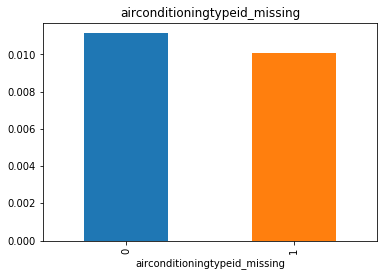

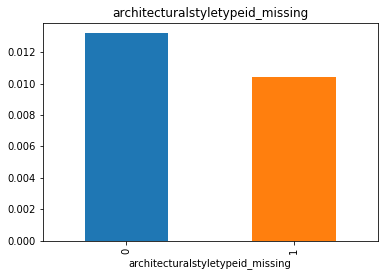

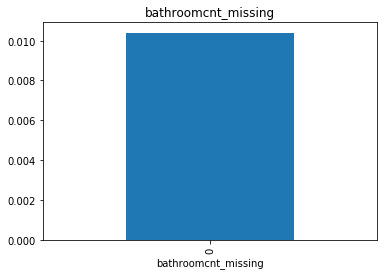

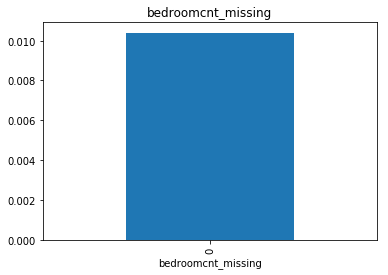

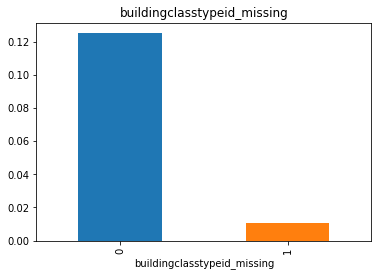

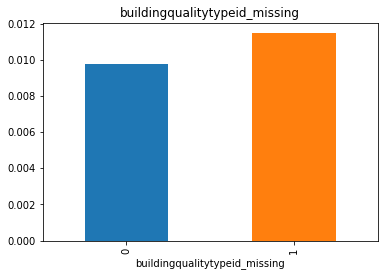

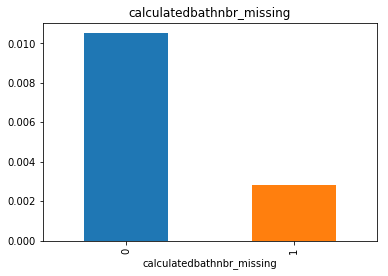

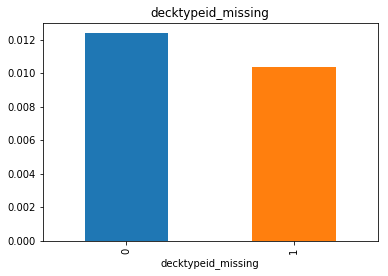

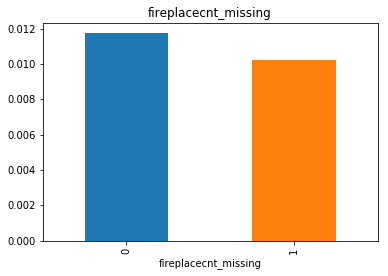

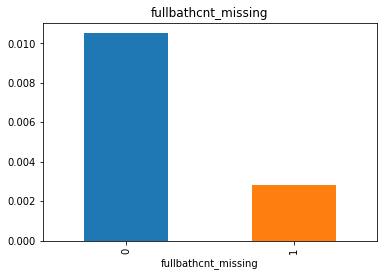

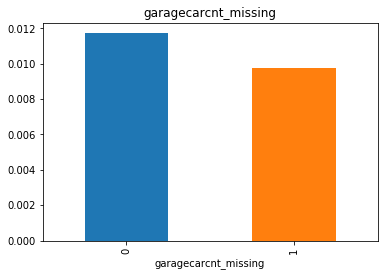

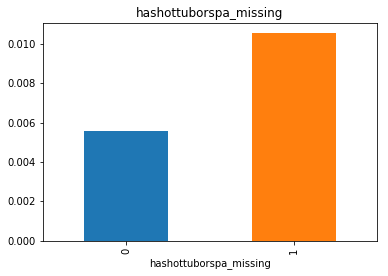

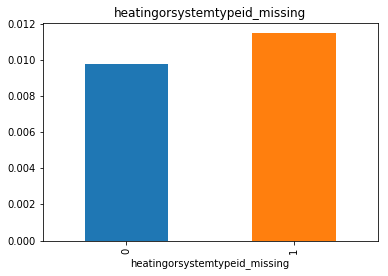

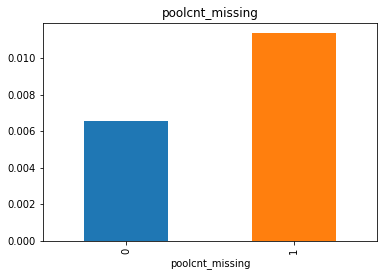

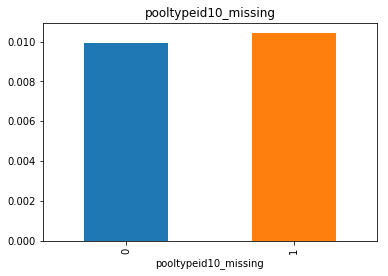

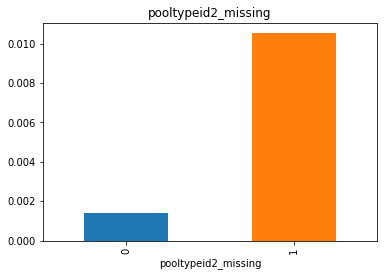

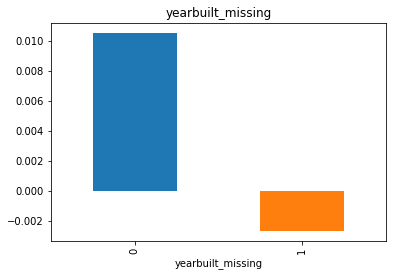

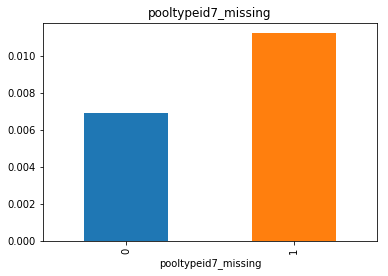

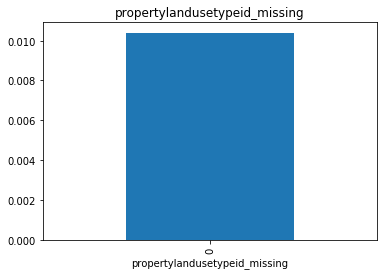

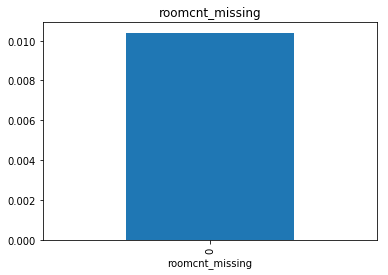

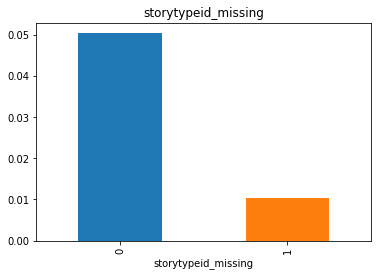

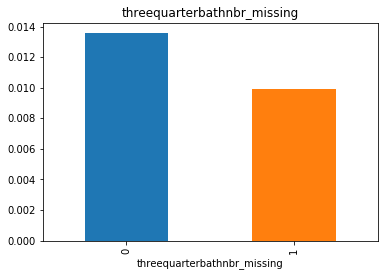

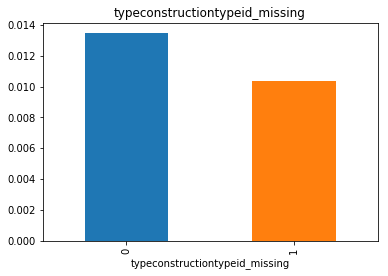

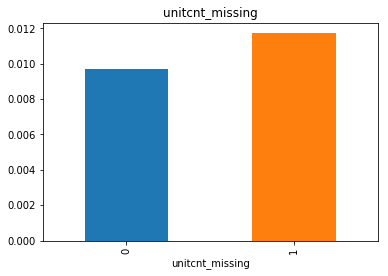

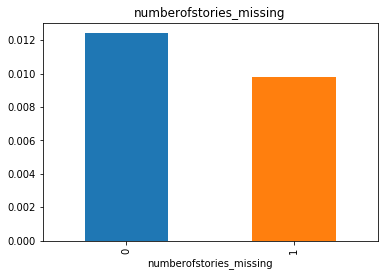

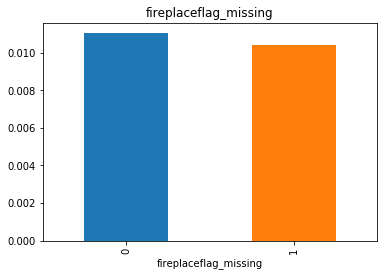

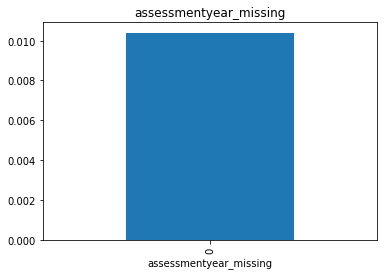

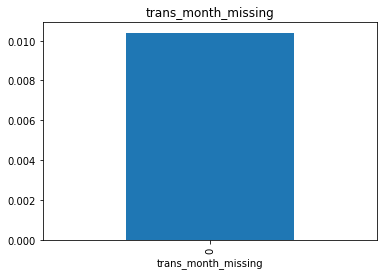

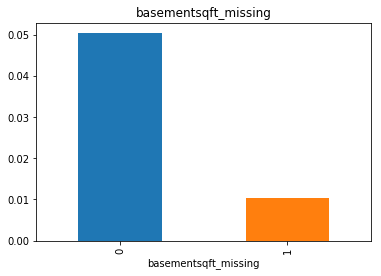

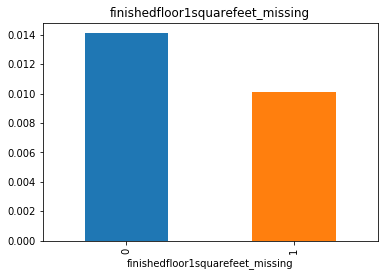

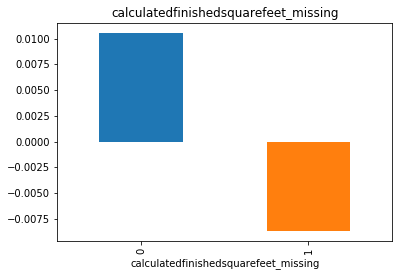

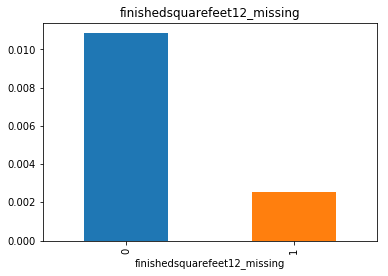

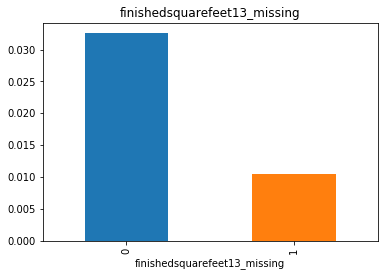

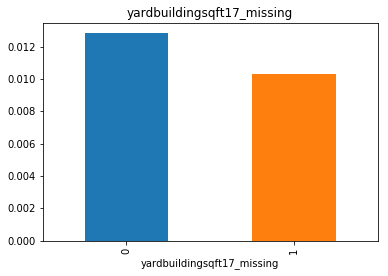

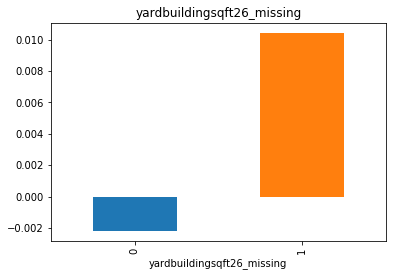

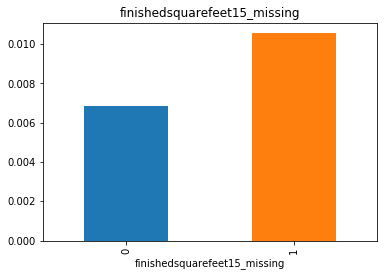

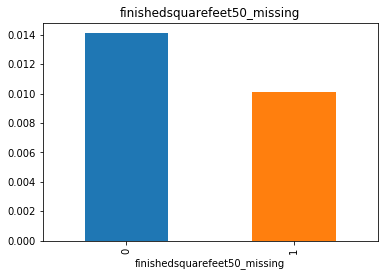

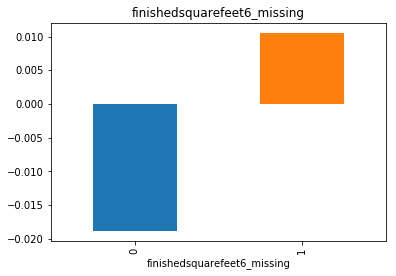

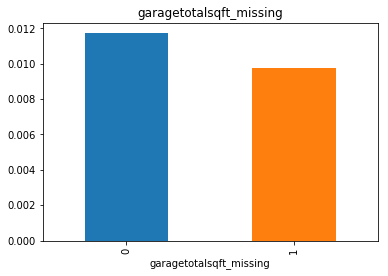

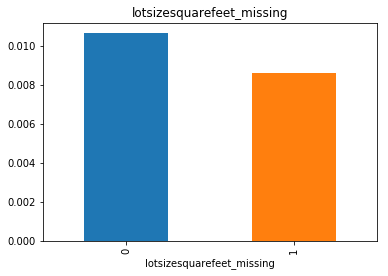

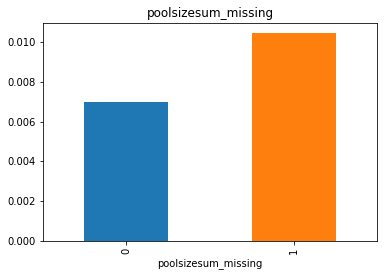

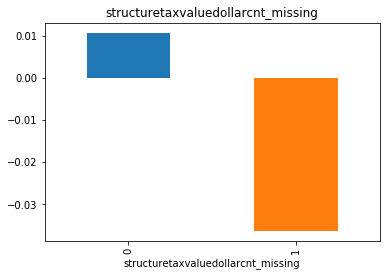

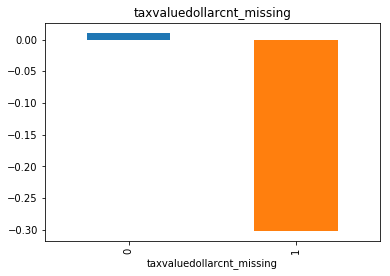

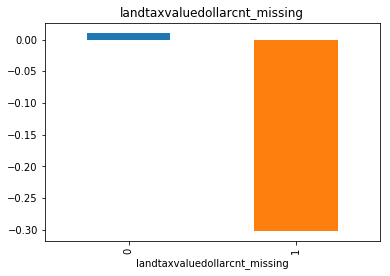

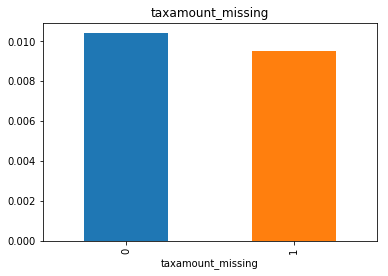

In [149]:
bi_cat_analysis(all2016,missing_list,'logerror2')

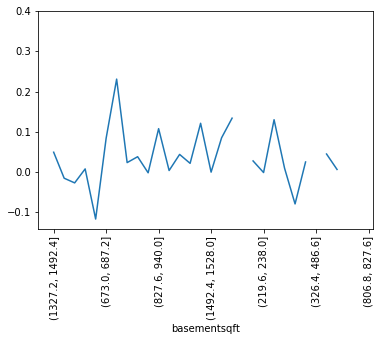

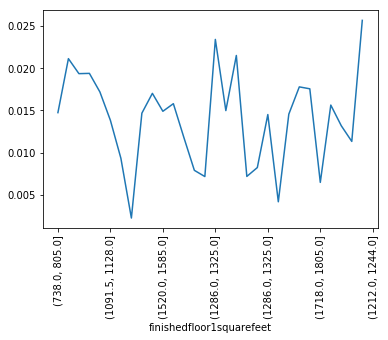

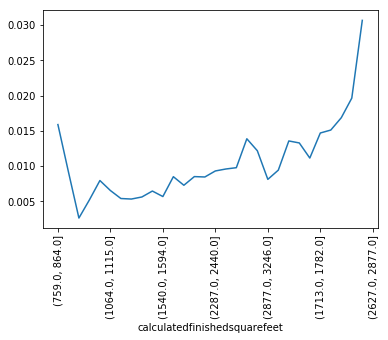

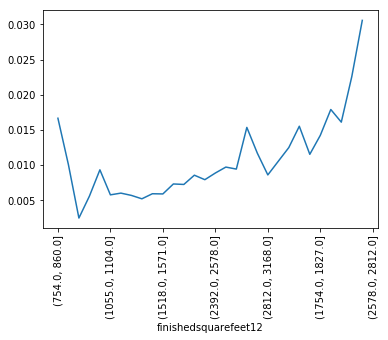

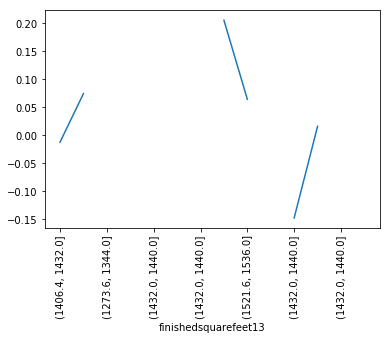

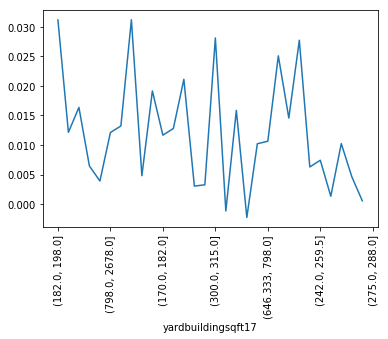

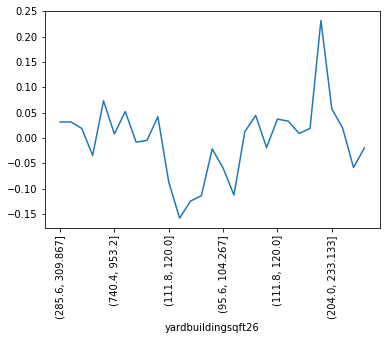

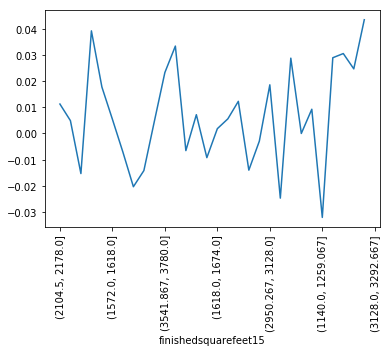

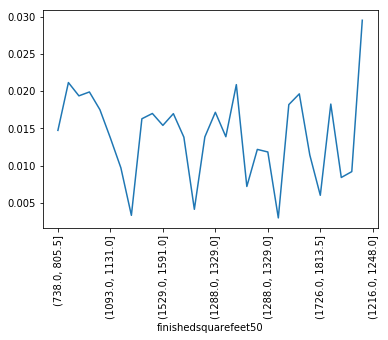

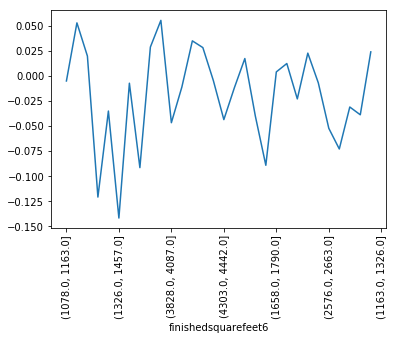

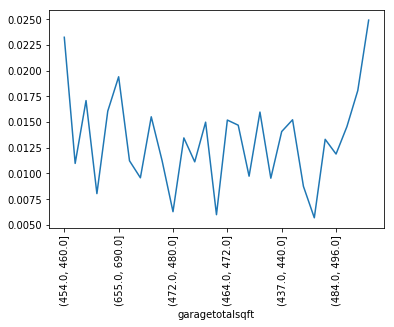

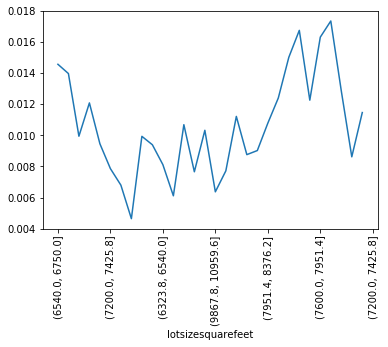

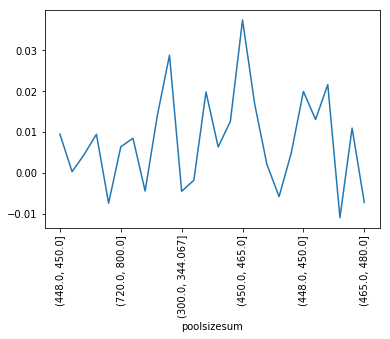

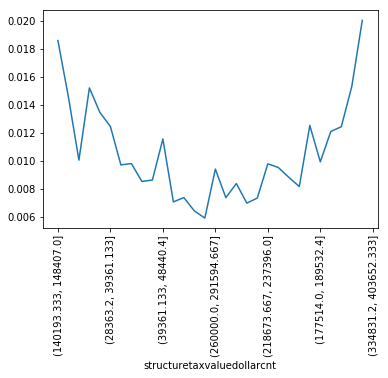

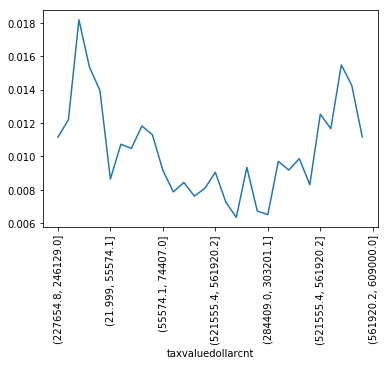

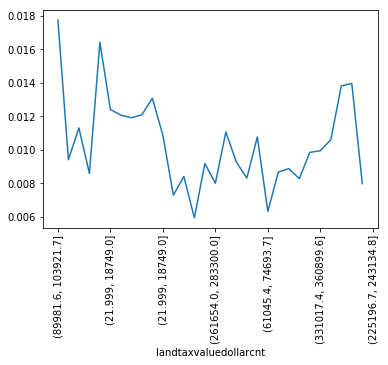

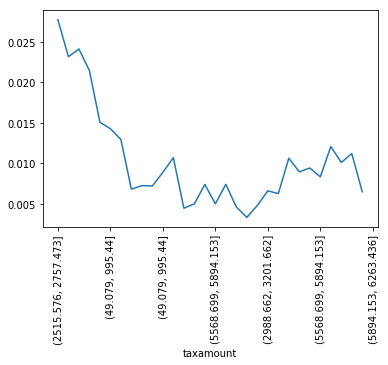

In [150]:

def bi_num_analysis(data,xvar_list, yvar):
    for xvar in xvar_list:
        temp_data=data[data[xvar]>0]
        group=pd.qcut(temp_data[xvar],30,duplicates='drop' )
        temp=temp_data.groupby(group)[yvar].mean()
        fig, ax = plt.subplots()
        fig=temp.plot()
        ax.set_xticklabels(group, rotation=90)
        plt.show()
bi_num_analysis(all2016,cont_list,'logerror2')

In [181]:
all_list=missing_list+cont_list+dummies_list
X_train=all2016[all_list]
y_train=all2016["logerror2"].values

# Deep Learning model

In [182]:
from sklearn.neural_network import MLPRegressor

In [183]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain, ytest=train_test_split(X_train, y_train, test_size=0.1,random_state=88)

In [184]:
Xtrain.shape

(81247, 258)

In [185]:
ytest.shape

(9028,)

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
scaler = StandardScaler()

In [188]:
scaler_model = scaler.fit(Xtrain)

/Users/Cui/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [189]:
X_train_trans = scaler_model.transform(Xtrain)
X_test_trans = scaler_model.transform(Xtest)

/Users/Cui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/Cui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [242]:
clf = MLPRegressor(hidden_layer_sizes=(200, 400, 100, 20,), activation = 'tanh', max_iter=1000)
clf_model = clf.fit(X_train_trans, ytrain)  

In [243]:
#rfc_best=RandomForestRegressor(criterion='mse',max_depth=10,max_features='log2',min_samples_split= 0.05,n_estimators= 100)
#rf_result_best=rfc_best.fit(Xtrain, ytrain)
pred=clf_model.predict(X_test_trans)

In [244]:
np.min(pred)

-0.29538206114422516

In [245]:
np.min(ytest)

-0.3425

In [246]:
np.max(pred)

0.3367937325681535

In [247]:
np.max(ytest)

0.4638819999999963

In [248]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, pred)

0.010347279814022142

In [249]:
clf_model.score(X_test_trans, ytest)

-0.0738060256652735